# Chapter 9: Classification and Regression Trees

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

## Import required packages

In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
# !pip install dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary


## Import and read the data RidingMowers

In [2]:
mower = pd.read_csv("RidingMowers.csv")

In [3]:
mower.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


# Build a Decision Tree with 1 node only

In [4]:
classTree = DecisionTreeClassifier(random_state=1, max_depth=1)
classTree.fit(mower.drop(columns=['Ownership']),mower['Ownership'])

DecisionTreeClassifier(max_depth=1, random_state=1)

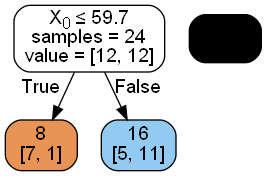

In [5]:
plotDecisionTree(classTree)

[Text(0.5, 0.75, 'X[0] <= 59.7\ngini = 0.5\nsamples = 24\nvalue = [12, 12]'),
 Text(0.25, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.75, 0.25, 'gini = 0.43\nsamples = 16\nvalue = [5, 11]')]

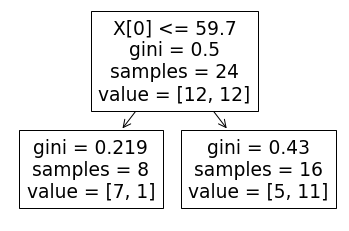

In [6]:
#Code if plotDecisionTree() doesn't work:
from sklearn import tree
tree.plot_tree(classTree)

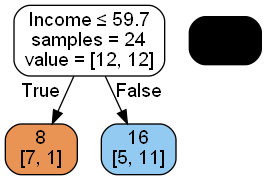

In [7]:
plotDecisionTree(classTree,feature_names=mower.columns[:2])

## Create a decision tree with all the nodes
Grow tree fully

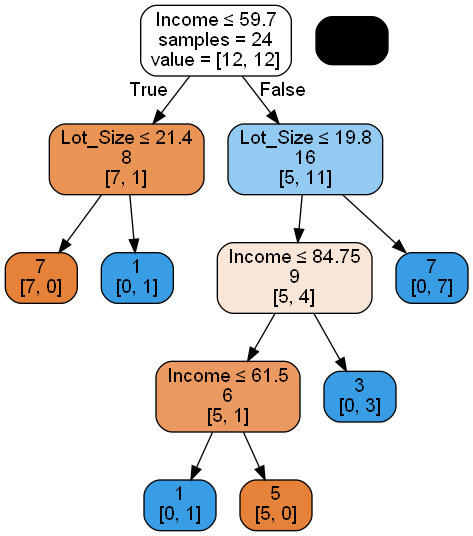

In [8]:
classTree = DecisionTreeClassifier(random_state=1)
classTree.fit(mower.drop(columns=['Ownership']),mower['Ownership'])

# tree.plot_tree(classTree)
plotDecisionTree(classTree,feature_names=mower.columns[:2])

## Universal Bank Data


* import and read the data
* drop Id, Zip vairables from the initial data
* split the data sets into train and validation sets (0.4)
* call and fit a Decision Tree

In [9]:
bank = pd.read_csv("UniversalBank.csv")
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
bank.columns = [ s.strip().replace(' ','_') for s in bank.columns]
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [11]:
bank=bank.drop(columns=['ID','ZIP_Code'])
bank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [12]:
X = bank.drop(columns=['Personal_Loan'])
y = bank['Personal_Loan']

train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.4, random_state=1)

In [13]:
fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(train_X,train_y)

DecisionTreeClassifier(random_state=1)

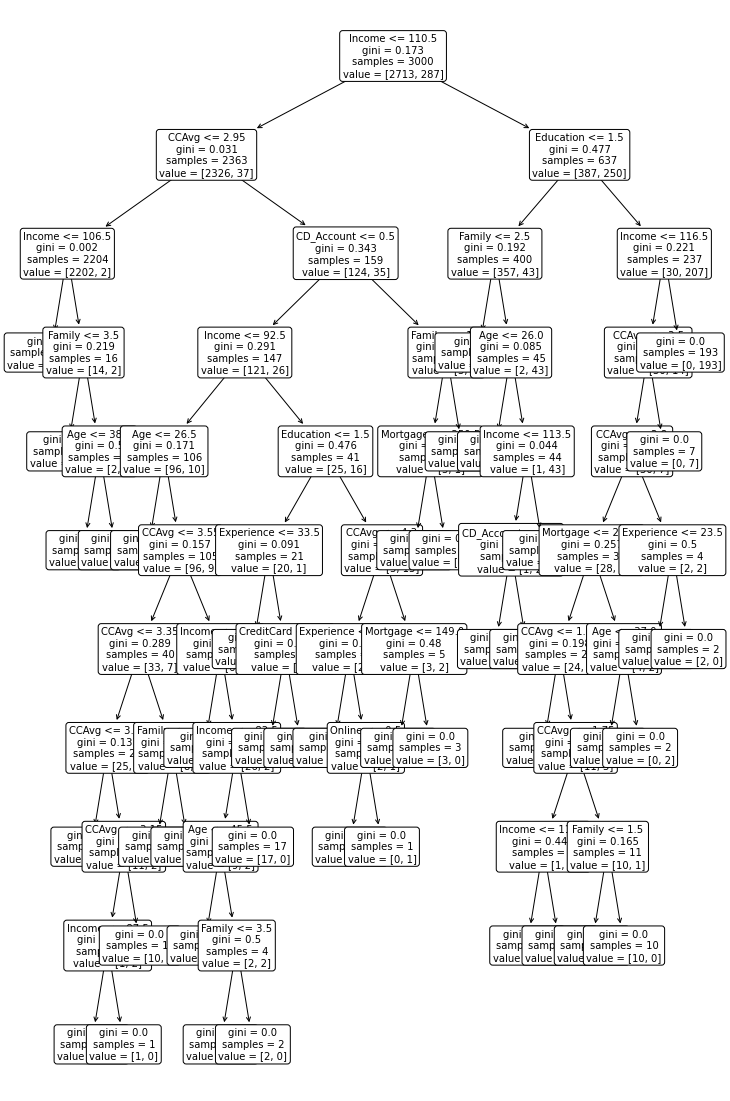

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 20))
plot_tree(fullClassTree, 
          rounded=True,                 # Rounded conners of nodes
          feature_names=X.columns,      # Feature names
          fontsize=10)
plt.show()

## Classfication Summary on the Full Tree
<!-- <div class='alert alert-danger'>R output for reference - remove once missing metrics are available.
```
> confusionMatrix(default.ct.point.pred.train, train.df$Personal.Loan)
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2696   26
         1   13  265
                                          
               Accuracy : 0.987           
                 95% CI : (0.9823, 0.9907)
    No Information Rate : 0.903           
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9243          
 Mcnemar's Test P-Value : 0.05466         
                                          
            Sensitivity : 0.9952          
            Specificity : 0.9107          
         Pos Pred Value : 0.9904          
         Neg Pred Value : 0.9532          
             Prevalence : 0.9030          
         Detection Rate : 0.8987          
   Detection Prevalence : 0.9073          
      Balanced Accuracy : 0.9529          
                                          
       'Positive' Class : 0               
```
</div>-->

In [15]:
#in practice never classify accuracy on train:
classificationSummary(train_y,fullClassTree.predict(train_X))
#in practice always classify accuracy on validation (or test):
classificationSummary(valid_y,fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287
Confusion Matrix (Accuracy 0.9790)

       Prediction
Actual    0    1
     0 1790   17
     1   25  168


## Create a Full DT with cv = 5

In [16]:
treeClassifier = DecisionTreeClassifier(random_state=1)
cross_val_score(treeClassifier, train_X, train_y, cv=5)

array([0.98833333, 0.97333333, 0.99333333, 0.98166667, 0.99333333])

In [17]:
#Google grid search cross validation sklearn and show 5 fold graphic

## Controlling for Overfitting using DT

In [18]:
smallClassTree = DecisionTreeClassifier(max_depth=3, random_state=1)
smallClassTree.fit(train_X,train_y)

DecisionTreeClassifier(max_depth=3, random_state=1)

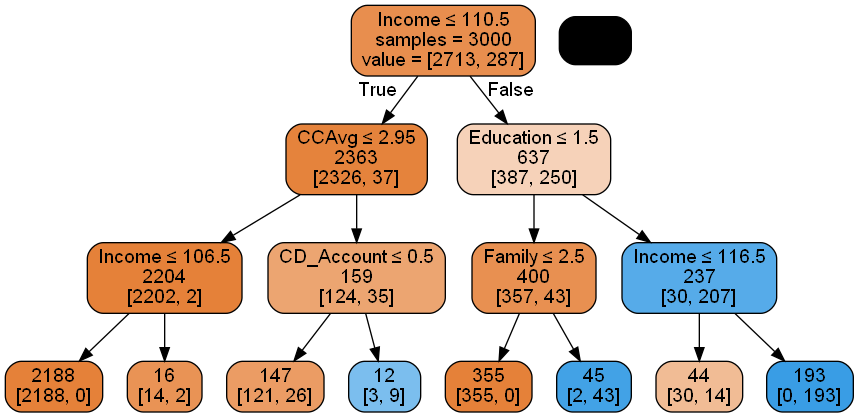

In [19]:
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

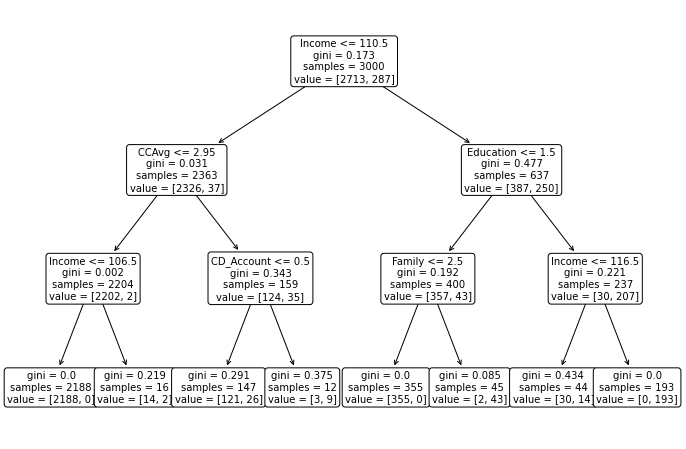

In [20]:
plt.figure(figsize=(12, 8))
plot_tree(smallClassTree, 
          rounded=True,                 # Rounded conners of nodes
          feature_names=X.columns,      # Feature names
          fontsize=10)
plt.show()

In [21]:
classificationSummary(valid_y,smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9800)

       Prediction
Actual    0    1
     0 1802    5
     1   35  158


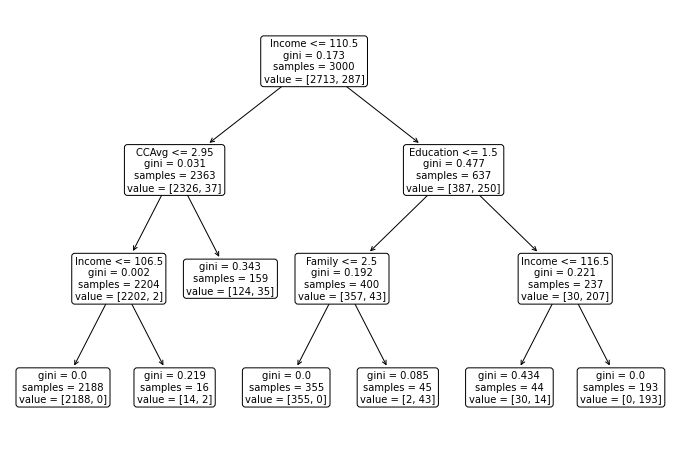

In [22]:
smallClassTree = DecisionTreeClassifier(max_depth=3, random_state=1, min_samples_split=0.07)
smallClassTree.fit(train_X,train_y)
plt.figure(figsize=(12, 8))
plot_tree(smallClassTree, 
          rounded=True,                 # Rounded conners of nodes
          feature_names=X.columns,      # Feature names
          fontsize=10)
plt.show()

In [23]:
classificationSummary(valid_y,smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9770)

       Prediction
Actual    0    1
     0 1804    3
     1   43  150


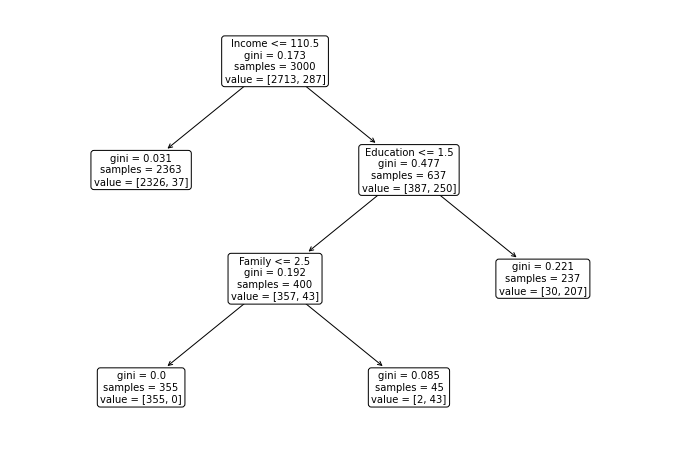

In [24]:
smallClassTree = DecisionTreeClassifier(max_depth=3, random_state=1, min_samples_split=0.07, min_impurity_decrease=0.02)
smallClassTree.fit(train_X,train_y)
plt.figure(figsize=(12, 8))
plot_tree(smallClassTree, 
          rounded=True,                 # Rounded conners of nodes
          feature_names=X.columns,      # Feature names
          fontsize=10)
plt.show()

In [25]:
classificationSummary(valid_y,smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9760)

       Prediction
Actual    0    1
     0 1791   16
     1   32  161


## Cross Validation


## Regression Trees 

* Create a prediction on toyota corolla prices
* use Age, km, fuel type, hp, met_color, Automatic, CC, doors, tax and weight as predictors

Random Forest

Create a Random Forest model on UniversalBank

## CART vs. CHAID

CART = Classification and Regression Trees
  Default optimization is Gini

CHAID = Chisquare Automatic Interaction Detection
  Uses Chisquare similar to logworth in SAS

## Hopefully Coming In Thursday's Lab
